In [28]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plot
import numpy as np

In [29]:
import pandas as pd

In [30]:
elapsed_times = pd.read_csv("elapsed_times.csv", sep=';', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

In [31]:
print(elapsed_times)

    schedule_type  chunk_size  iterations  avail_threads  mop_s_thread  time
0          static           1          10              8        293.57  8.14
1          static        1000          10              8        291.55  8.19
2          static        1500          10              8        286.98  8.33
3          static        2000          10              8        248.58  9.61
4          static        2500          10              8        260.75  9.16
5          static        3000          10              8        273.58  8.73
6          static        3500          10              8        278.04  8.59
7          static        4000          10              8        271.50  8.80
8          static        4500          10              8        279.21  8.56
9          static        5000          10              8        275.08  8.69
10         static        5500          10              8        253.10  9.44
11         static        6000          10              8        276.76  8.63

In [32]:
guided = elapsed_times[elapsed_times['schedule_type'] == "guided"][['chunk_size', 'time']]
static = elapsed_times[elapsed_times['schedule_type'] == "static"][['chunk_size', 'time']]
dynamic = elapsed_times[elapsed_times['schedule_type'] == "dynamic"][['chunk_size', 'time']]

In [58]:
from sklearn import linear_model

def plot_all():
    plot.plot(static['chunk_size'], static['time'], "-", label="static")
    plot.plot(dynamic['chunk_size'], dynamic['time'], "-", label="dynamic")
    plot.plot(guided['chunk_size'], guided['time'], "-", label="guided")
    plot.xlabel("chunk_size")
    plot.ylabel("elapsed_time (s)")
    plot.legend(loc='upper left')
    
def plot_alone_linear(df, schedule):
    regr = linear_model.LinearRegression()
    regr.fit(df['chunk_size'][:,np.newaxis], df['time'])
    x_test = np.linspace(np.min(df['chunk_size']), np.max(df['chunk_size']), 100)
    
    plot.plot(x_test, regr.predict(x_test[:,np.newaxis]), "-", label=schedule)
    plot.xlabel("chunk_size")
    plot.ylabel("elapsed_time (s)")
    plot.legend(loc='upper left')
    
def plot_alone(df, schedule):
    plot.plot(df['chunk_size'], df['time'], "-", label=schedule + "_linear")
    plot.xlabel("chunk_size")
    plot.ylabel("elapsed_time (s)")
    plot.legend(loc='upper left')

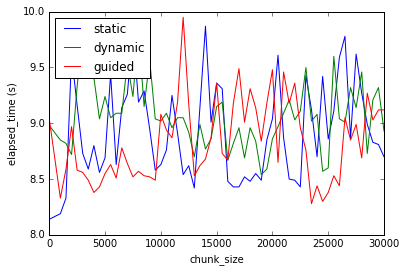

In [59]:
plot_all()

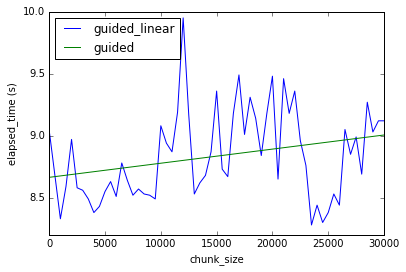

In [60]:
plot_alone(guided, "guided")
plot_alone_linear(guided, "guided")

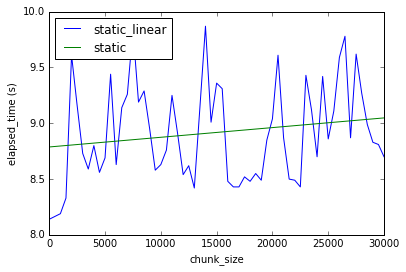

In [61]:
plot_alone(static, "static")
plot_alone_linear(static, "static")

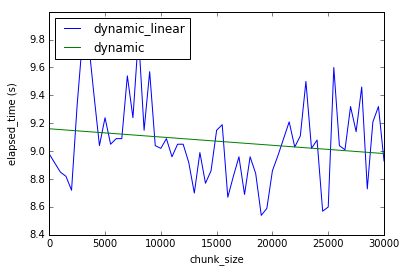

In [62]:
plot_alone(dynamic, "dynamic")
plot_alone_linear(dynamic, "dynamic")